# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key
TempUnits = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create Weather map url
FullUrl = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={TempUnits}&q="


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
TotalCities = len(cities)
TotalCities

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Declaring Dataframe Lists.
Cloudiness = []
Countries = []
Dates = []
Humidities= []
Lats = []
Lngs = []
MaxTemps= []
WindSpeeds = []
CityTwo = []

# Set Counts.
CountOne = 0
SetOne = 1


print ("Beginning Data Retrieval")
print ("-----------------------------")

#For Loop to go through all the cites and its respective weather data.
for EachCity in cities:
    try:
        #Get URL Response in Json format.
        UrlResponse = requests.get(FullUrl + EachCity.replace(" ","&")).json()
        #Get Cloudiness percentage.
        Cloudiness.append(UrlResponse['clouds']['all'])
        #Get Countries.
        Countries.append(UrlResponse['sys']['country'])
        #Get Dates.
        Dates.append(UrlResponse['dt'])
        #Get Humidities
        Humidities.append(UrlResponse['main']['humidity'])
        #Get Latitudes.
        Lats.append(UrlResponse['coord']['lat'])
        #Get Longitudes.
        Lngs.append(UrlResponse['coord']['lon'])
        MaxTemps.append(UrlResponse['main']['temp_max'])
        WindSpeeds.append(UrlResponse['wind']['speed'])
        #Just printing the cities data in less than 50 batch for ease of reading.
        if CountOne > 48:
            CountOne = 1
            SetOne += 1
            CityTwo.append(EachCity)
        else:
            CountOne += 1
            CityTwo.append(EachCity)
        print(f"Processing Record {CountOne} of Set {SetOne} | {EachCity}")
    except Exception:
        print(f"{EachCity} not found. Skipping...")
    
       

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | albany
barentsburg not found. Skipping...
yian not found. Skipping...
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | gonen
Processing Record 13 of Set 1 | pacific grove
grimari not found. Skipping...
Processing Record 14 of Set 1 | esmeralda
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | sao sebastiao
Processing Record 17 of Set 1 | brae
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | cairns
Processing Record 20 of Set 1 | muravlenko
Processing Record 21 of Set 1 | yular

Processing Record 32 of Set 4 | nancha
Processing Record 33 of Set 4 | gigmoto
Processing Record 34 of Set 4 | sao filipe
Processing Record 35 of Set 4 | linfen
Processing Record 36 of Set 4 | pavlodar
Processing Record 37 of Set 4 | ponta do sol
geresk not found. Skipping...
Processing Record 38 of Set 4 | saint-augustin
Processing Record 39 of Set 4 | mairena del alcor
Processing Record 40 of Set 4 | thomasville
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | biloli
Processing Record 43 of Set 4 | northam
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | manono
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | victoria
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | marsa matruh
Processing Record 3 of Set 5 | okhotsk
Processing Record 4 of Set 5 | macusani
belushya guba not found. Skipping...
Processing Rec

Processing Record 21 of Set 8 | arica
Processing Record 22 of Set 8 | deder
Processing Record 23 of Set 8 | tarauaca
Processing Record 24 of Set 8 | novouzensk
Processing Record 25 of Set 8 | zabid
Processing Record 26 of Set 8 | baicheng
Processing Record 27 of Set 8 | marawi
Processing Record 28 of Set 8 | hovd
Processing Record 29 of Set 8 | nhamunda
Processing Record 30 of Set 8 | hofn
Processing Record 31 of Set 8 | maracai
Processing Record 32 of Set 8 | koungou
Processing Record 33 of Set 8 | mpongwe
conceicao do araguaia not found. Skipping...
Processing Record 34 of Set 8 | mehamn
Processing Record 35 of Set 8 | mys shmidta
Processing Record 36 of Set 8 | beecher
Processing Record 37 of Set 8 | mocuba
Processing Record 38 of Set 8 | lar
Processing Record 39 of Set 8 | goderich
Processing Record 40 of Set 8 | aswan
kuche not found. Skipping...
Processing Record 41 of Set 8 | challapata
Processing Record 42 of Set 8 | santa cruz
Processing Record 43 of Set 8 | asau
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Building a Weather Dictionary.
WeatherDict = {"City":CityTwo,
               "Cloudiness":Cloudiness,
               "Country":Countries,
               "Date":Dates,
               "Humidity":Humidities,
               "Lat":Lats,
               "Lng":Lngs,
               "Max Temp":MaxTemps,
               "Wind Speed":WindSpeeds}
    

In [7]:
WeatherReportDF= pd.DataFrame(WeatherDict)

In [8]:
WeatherReportDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,iqaluit,75,CA,1635630291,69,63.7506,-68.5145,37.13,11.01
1,hermanus,58,ZA,1635630291,87,-34.4187,19.2345,61.90,8.39
2,mataura,100,NZ,1635630292,96,-46.1927,168.8643,49.66,12.59
3,albany,93,US,1635630292,90,42.6001,-73.9662,57.78,3.33
4,butaritari,24,KI,1635630293,73,3.0707,172.7902,82.38,6.20


In [9]:
WeatherReportDF.to_csv(output_data_file)

In [11]:
#Getting the count of cities found in the weather data.
CitiesFound = WeatherReportDF["City"].count()
CitiesFound

539

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

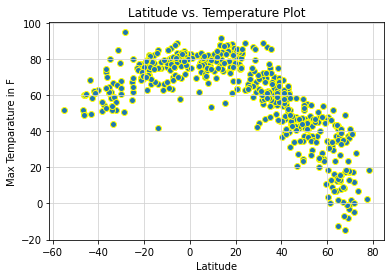

In [12]:
#Ploting Data for Scatter Plot.
plt.scatter(WeatherReportDF["Lat"],WeatherReportDF["Max Temp"],edgecolors="yellow")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temparature in F")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatVsMaxTempSCPlot.png")
plt.show()

## Latitude vs. Humidity Plot

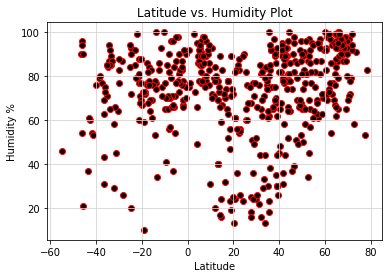

In [13]:
#Ploting Data for Scatter Plot.
plt.scatter(WeatherReportDF["Lat"],WeatherReportDF["Humidity"],edgecolors="red",facecolors="black")
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatVsHumiditySCPlot.png")
plt.show()

## Latitude vs. Cloudiness Plot

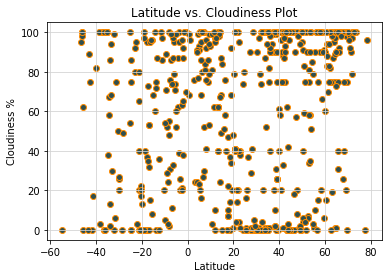

In [14]:
#Ploting Data for Scatter Plot.
plt.scatter(WeatherReportDF["Lat"],WeatherReportDF["Cloudiness"],edgecolors="darkorange",facecolors="darkslategray")
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatVsCloudinessSCPlot.png")
plt.show()

## Latitude vs. Wind Speed Plot

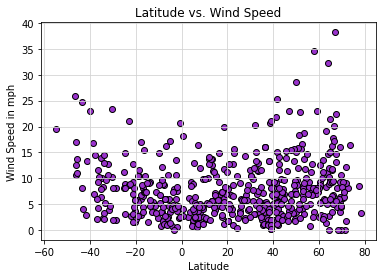

In [15]:
#Ploting Data for Scatter Plot.
plt.scatter(WeatherReportDF["Lat"],WeatherReportDF["Wind Speed"],edgecolors="black",facecolors="darkorchid")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in mph")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatVsWindSpeedSCPlot.png")
plt.show()

## Linear Regression

In [42]:
# Create Northern and Southern Hemisphere DataFrames
NorthHemiDF = WeatherReportDF.loc[pd.to_numeric(WeatherReportDF["Lat"]).astype(float) >= 0, :]
SouthHemiDF = WeatherReportDF.loc[pd.to_numeric(WeatherReportDF["Lat"]).astype(float) < 0, :]

In [40]:
NorthHemiDF.head(3)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,iqaluit,75,CA,1635630291,69,63.7506,-68.5145,37.13,11.01
3,albany,93,US,1635630292,90,42.6001,-73.9662,57.78,3.33
4,butaritari,24,KI,1635630293,73,3.0707,172.7902,82.38,6.20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.99x + 91.87
The r-squared is: -0.8639490093932805
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


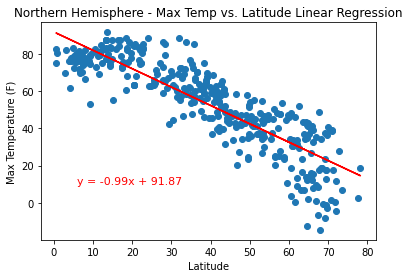

In [74]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(NorthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(NorthHemiDF['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.52x + 81.07
The r-squared is: 0.6674854968134357
The regression displays a Positive correlation.
In the Southern hemisphere, as you get closer to the equator the temperature increases.


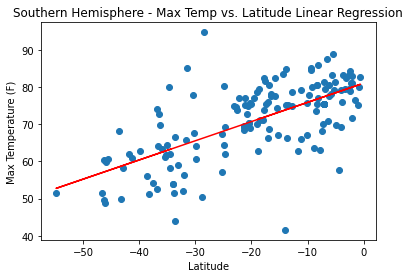

In [64]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(SouthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(SouthHemiDF['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a Positive correlation.")
print("In the Southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.24x + 64.02
The r-squared is: 0.2353651246186786
The regression does not display much of a correlation between the data sets.


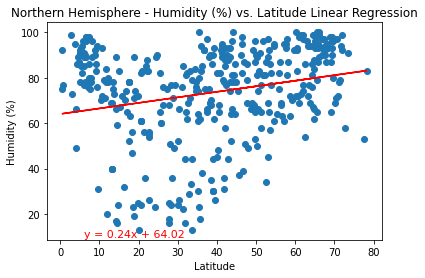

In [72]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(NorthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(NorthHemiDF['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 76.57
The r-squared is: 0.14268419737901927
The regression does not display much of a correlation between the data sets.


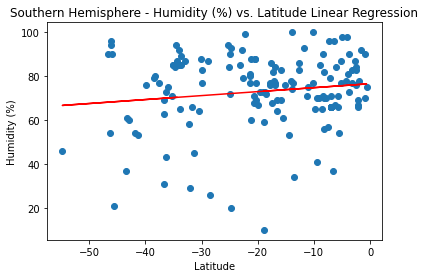

In [71]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(SouthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(SouthHemiDF['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.28x + 49.69
The r-squared is: 0.14484275204703884
The regression does not display much of a correlation between the data sets.


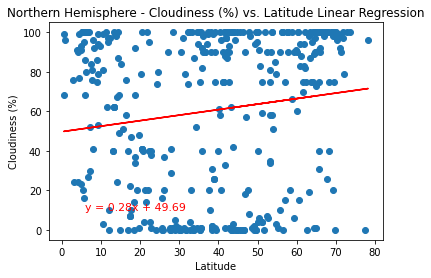

In [67]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(NorthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(NorthHemiDF['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 61.14
The r-squared is: 0.1181307316358491
The regression does not display much of a correlation between the data sets.


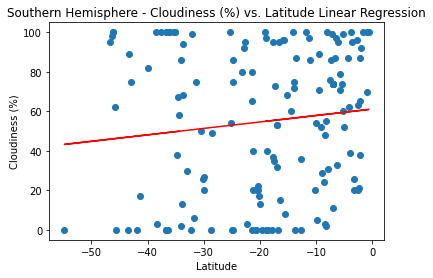

In [68]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(SouthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(SouthHemiDF['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 5.2
The r-squared is: 0.2229406177393324
The regression does not display much of a correlation between the data sets.


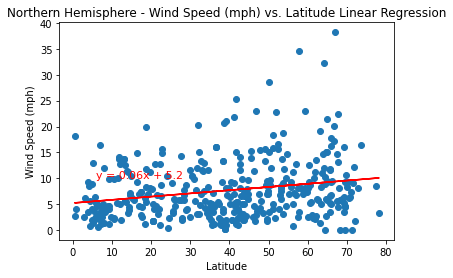

In [70]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(NorthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(NorthHemiDF['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.16x + 4.58
The r-squared is: -0.39843764783981667
The regression does not display much of a correlation between the data sets.


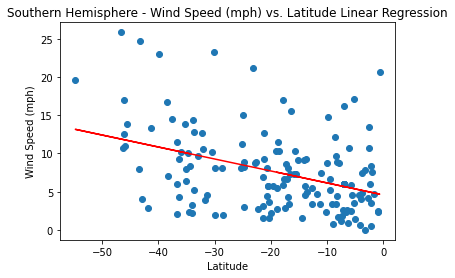

In [69]:
#Assign X and Y cordinates on the Graph.
Xvalues = pd.to_numeric(SouthHemiDF['Lat']).astype(float)
Yvalues = pd.to_numeric(SouthHemiDF['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
RegressValues = Xvalues * slope + intercept
LineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LineEquation}")
#Ploting Data for Scatter Plot.
plt.scatter(Xvalues,Yvalues)
plt.plot(Xvalues,RegressValues,"r-")
plt.annotate(LineEquation,(6,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()